In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

import utils

### Clean file from error runs

In [3]:
fix_path = "../time/batch_sizes"
with open(fix_path) as f:
        fix_text = f.read()
runs = fix_text.split("--------------------------------------------------------------\n")
new_text = ""
for run in runs:
        if "hconcat" not in run and "ERROR: Could not open '" not in run:
            new_text += "--------------------------------------------------------------\n"
            new_text += run
with open(fix_path, "w") as f:
    f.write(new_text)

### Get input

In [4]:
dir = "/home/sara/Documents/Master-thesis/TFLite/time"
files = os.listdir(dir)

text = ""
for file in files:
    path = os.path.join(dir, file)
    with open(path) as f:
        text += f.read()

runs = text.split("--------------------------------------------------------------\n")
print(f"Number of runs: {len(runs)}")

Number of runs: 118


In [5]:
headers = ["Iterations", "Type", "Precision", "Size", "Model", "Batch size", "Nr threads", "Device", "Method", "Verbose", "Invoke", "Status", 
            "Preprocess (s)", "Preprocess (min)",
            "Inference (s)", "Inference (min)",
            "Init (s)", "Load image (s)", "Tile image (s)", 
            "Load input (s)", "Load input once (s)", 
            "Detect (s)", "Detect once (s)", 
            "Get output (s)", "Get output once (s)", 
            "Total (s)", "Total (min)"]

In [6]:
value_list = []
clean_log = ""
for run in runs:
    if "SKIPPED" not in run:
        data = run.split("\n")
        info = data[0].split(",")
        if len(info) < 10:
            continue
        values = []
        for i in info:
            values.append(i.split(":")[1].strip())

        if "cv::Exception" in run:
            values.append("BROKEN")
        elif "ERROR" in run:
            values.append("ERROR")
        elif "amdgpu" in run:
            values.append("OUT OF MEMORY")
        elif "Killed" in run:
            values.append("KILLED")
        elif "Aborted" in run:
            values.append("ABORTED")
        else:
            values.append("SUCCESS")

        total_times = []

        for d in data:
            if "Duration" in d:
                total_times.append(int(d.split(":")[-1].strip()))
            elif "Preprocessing" in d:
                value = float(d.split(":")[-1].strip("us").strip())
                values.append((value)/1000000)
                values.append((value)/1000000/60)
            elif "Inference" in d:
                value = float(d.split(":")[-1].strip("us").strip())
                values.append((value)/1000000)
                values.append((value)/1000000/60)
            elif "Init" in d and not "Initialized" in d and not "TfLiteGpuDelegate Init" in d:
                value = float(d.split("(")[-1].split(",")[0].strip())
                values.append((value)/1000000)
            elif "Load image" in d:
                value = float(d.split("(")[-1].split(",")[0].strip())
                values.append((value)/1000000)
            elif "Tile image" in d:
                value = float(d.split("(")[-1].split(",")[0].strip())
                values.append((value)/1000000)
            elif "Load input" in d:
                parts = d.split("(")
                value = float(parts[1].split(",")[0].strip())
                values.append((value)/1000000)
                value = float(parts[2].split(",")[0].strip())
                values.append((value)/1000000)
            elif "Detect" in d:
                parts = d.split("(")
                value = float(parts[1].split(",")[0].strip())
                values.append((value)/1000000)
                value = float(parts[2].split(",")[0].strip())
                values.append((value)/1000000)
            elif "Get output" in d:
                parts = d.split("(")
                value = float(parts[1].split(",")[0].strip())
                values.append((value)/1000000)
                value = float(parts[2].split(",")[0].strip())
                values.append((value)/1000000)

        
        # Total time
        values.append(np.average(total_times)/1000000)
        values.append(np.average(total_times)/1000000/60)


        value_list.append(values)


run_df = pd.DataFrame(value_list, columns=headers)
run_df

/home/sara/anaconda3/envs/master/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/sara/anaconda3/envs/master/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Iterations,Type,Precision,Size,Model,Batch size,Nr threads,Device,Method,Verbose,...,Load image (s),Tile image (s),Load input (s),Load input once (s),Detect (s),Detect once (s),Get output (s),Get output once (s),Total (s),Total (min)
0,3,class_models,1,32,32-fp16.tflite,1,1,1,3,0,...,238.669568,3.977826,17.274756,0.000176,221.220656,0.002258,0.174164,0.000001,392.962901,6.549382
1,3,class_models,1,192,192-fp16.tflite,1,1,1,3,0,...,45.377708,0.756295,19.141034,0.006814,26.232288,0.009338,0.004387,0.000001,102.468428,1.707807
2,3,class_models,1,480,480-fp16.tflite,1,1,1,3,0,...,38.478024,0.641300,19.779178,0.044850,18.696582,0.042395,0.002263,0.000005,88.531464,1.475524
3,3,class_models,1,288,288-fp16.tflite,1,1,1,3,0,...,37.874264,0.631238,19.212326,0.043565,18.659734,0.042312,0.002202,0.000005,87.727245,1.462121
4,3,class_models,1,672,672-fp16.tflite,1,1,1,3,0,...,35.854568,0.597576,17.156830,0.076252,18.696590,0.083096,0.001147,0.000005,84.597841,1.409964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3,class_models,1,768,768-fp16.tflite,1,5,0,2,0,...,29.819864,0.496998,1.127270,0.005751,28.691720,0.146386,0.000874,0.000004,47.606325,0.793439
111,3,class_models,1,1152,1152-fp16.tflite,1,5,0,2,0,...,27.955492,0.465925,1.043743,0.012885,26.911382,0.332239,0.000365,0.000004,44.819445,0.746991
112,3,class_models,1,1440,1440-fp16.tflite,1,5,0,2,0,...,26.378848,0.439647,0.996547,0.020337,25.382074,0.518001,0.000226,0.000004,42.457800,0.707630
113,3,class_models,1,2080,2080-fp16.tflite,1,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Methods

Average diff: 16.57157473214286


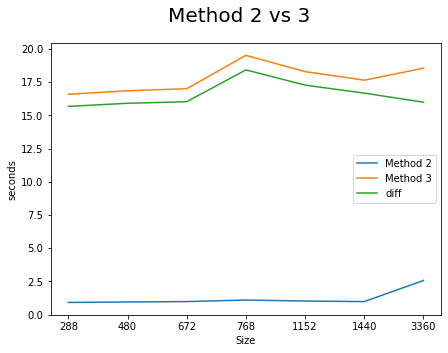

In [5]:
method2 = run_df[(run_df['Method']=="2") & 
                    (run_df['Device']=="0") & 
                    (run_df['Type']=="yolo_models") & 
                    (run_df['Precision']=="1") &
                    #(run_df['Size']=="768") &
                    (run_df['Nr threads']=="1") &
                    (run_df['Batch size']=="1")]
method3 = run_df[(run_df['Method']=="3") & 
                    (run_df['Device']=="0") & 
                    (run_df['Type']=="yolo_models") & 
                    (run_df['Precision']=="1") &
                    #(run_df['Size']=="768") &
                    (run_df['Nr threads']=="1") &
                    (run_df['Batch size']=="1")]

data = [method2, method3]
legends = ["Method 2", "Method 3"]

utils.plot_multi(data, legends, x_label = "Size", y_label = "Load input (s)", title = "Method 2 vs 3", plot_diff=True)

# Class

### Multithreading

In [7]:
multithreading_df = run_df[(run_df['Method']=="2") & 
                    (run_df['Device']=="0") & 
                    (run_df['Type']=="class_models") & 
                    (run_df['Precision']=="1") &
                    (run_df['Size']!="2080") &
                    #(run_df['Nr threads']=="1") &
                    (run_df['Batch size']=="1")]
del multithreading_df["Precision"]
del multithreading_df["Type"]
del multithreading_df["Status"]
del multithreading_df["Invoke"]
del multithreading_df["Method"]
del multithreading_df["Verbose"]
del multithreading_df["Device"]
del multithreading_df["Model"]
del multithreading_df["Batch size"]
del multithreading_df["Iterations"]
#display(multithreading_df)


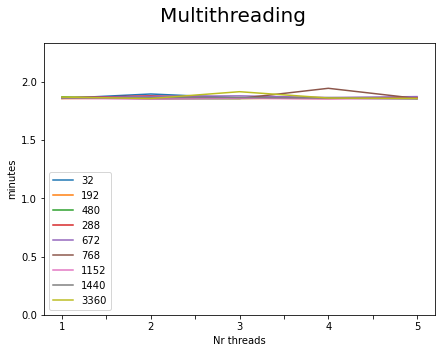

In [8]:
data =[]
legends = multithreading_df["Size"].unique()
for d in legends:
    df_part = multithreading_df[multithreading_df["Size"]==d]
    data.append(df_part)


utils.plot_multi(data, legends, x_label = "Nr threads", y_label = "Inference (min)", title = "Multithreading", plot_diff=False)


### Batch sizes

In [33]:
bs_df = run_df[(run_df['Method']=="3") & 
                    #(run_df['Device']=="1") & 
                    (run_df['Type']=="class_models") & 
                    (run_df['Precision']=="1") &
                    (run_df['Size']!="32") & 
                    (run_df['Size']!="192") & 
                    (run_df['Size']!="480") & 
                    (run_df['Size']!="1152") & 
                    (run_df['Size']!="768") & 
                    (run_df['Size']!="1440") & 
                    (run_df['Size']!="3360") & 
                    #(run_df['Batch size']=="1") &
                    (run_df['Nr threads']=="1")]
bs_CPU_df = bs_df[(run_df['Device']=="0")]
bs_GPU_df = bs_df[(run_df['Device']=="1")]


/home/sara/anaconda3/envs/master/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/sara/anaconda3/envs/master/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


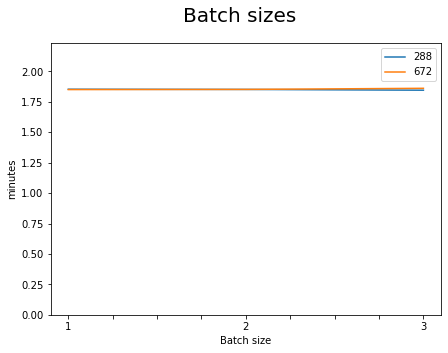

In [34]:
data =[]
legends = bs_GPU_df["Size"].unique()
for d in legends:
    df_part = bs_GPU_df[bs_GPU_df["Size"]==d]
    data.append(df_part)


utils.plot_multi(data, legends, x_label = "Batch size", y_label = "Inference (min)", title = "Batch sizes", plot_diff=False)

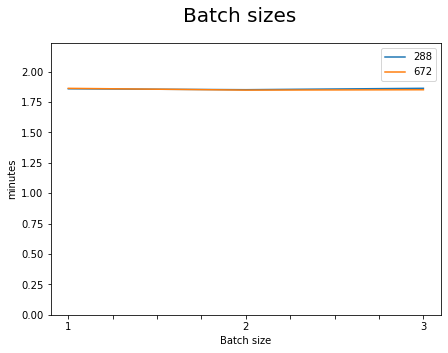

In [36]:
data =[]
legends = bs_CPU_df["Size"].unique()
for d in legends:
    df_part = bs_CPU_df[bs_CPU_df["Size"]==d]
    data.append(df_part)


utils.plot_multi(data, legends, x_label = "Batch size", y_label = "Inference (min)", title = "Batch sizes", plot_diff=False)

### CPU

TypeError: '>' not supported between instances of 'str' and 'int'

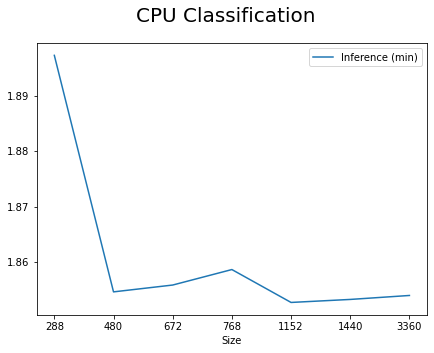

In [35]:
runs_CPU = run_df[(run_df['Method']=="2") & 
                    (run_df['Device']=="0") & 
                    (run_df['Type']=="yolo_models") & 
                    (run_df['Precision']=="1") &
                    #(run_df['Size']=="768") &
                    (run_df['Nr threads']=="1") &
                    (run_df['Batch size']=="1")]


data =[runs_CPU]
legends = ["Inference (min)"]
utils.plot_multi(data, legends, x_label = "Size", y_label = legends, title = "CPU Classification", plot_diff=False)
print(f"Average time{np.average(runs_CPU[legends[0]])}")

In [ ]:
legends = ["Tile image (s)"]
utils.plot_multi(data, legends, x_label = "Size", y_label = legends, title = "CPU Classification", plot_diff=False)

In [ ]:
legends = ["Load inputs (s)"]
utils.plot_multi(data, legends, x_label = "Size", y_label = legends, title = "CPU Classification", plot_diff=False)